# Part III: Linear & Ridge Regressions using OLS

Using the same preposcessing code from part 1 of the assignment

In [2]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [3]:
from google.colab import drive
drive.mount('/content/drive')
%cd ..
%cd /content/drive/MyDrive

Mounted at /content/drive
/
/content/drive/MyDrive


In [4]:
#reading dataset #2
df = pd.read_csv("diamond.csv")
print(df.head())
print(df.dtypes)

  Unnamed: 0 carat      cut color clarity  average us salary  \
0          1  0.23    Ideal     E     SI2              31282   
1          2  0.21  Premium     E     SI1              40049   
2          3  0.23     Good     E     VS1              33517   
3          4  0.29  Premium     I     VS2              38495   
4          5  0.31     Good     J     SI2              34178   

   number of diamonds mined (millions) depth table price     x     y     z  
0                                 5.01  61.5    55   326  3.95  3.98  2.43  
1                                 1.69  59.8    61   326  3.89  3.84  2.31  
2                                 3.85  56.9    65   327  4.05  4.07  2.31  
3                                 3.49  62.4    58   334   4.2  4.23  2.63  
4                                 4.70  63.3    58   335  4.34  4.35  2.75  
Unnamed: 0                              object
carat                                   object
cut                                     object
color       

In [5]:
#cleaning the data and hadnling the missing data. Also handling mismatched strings

df.drop_duplicates(inplace=True)
df.drop('Unnamed: 0', axis=1, inplace=True) # same as index in dataframe

columns_numeric = ['carat','average us salary','table','depth','price','x','y','z']
# Identify non-numeric values in the column
for col in columns_numeric:
  df[col] = pd.to_numeric(df[col], errors='coerce')

columns_string = ['cut','clarity','color']

for col in columns_string:
  df[col] = df[col].replace({'MAYBE':np.NaN})
  df[col] = df[col].replace({'FALSE':np.NaN})
  df[col] = df[col].replace({'TRUE':np.NaN})

#removed the table column since I wanted the whole number as is
for col in ['carat','average us salary','depth','price','x','y','z']:
  df[col].fillna(df[col].mean(), inplace=True)

df['table'].fillna(df['table'].median())

#for strings to have same format
for column in columns_string:
    # Strip whitespaces
    df[column] = df[column].str.strip()
    # Convert to title case
    df[column] = df[column].str.title()

#dropping some of the nan values as its a big dataset
df.dropna(inplace=True)

missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

print(df)


Missing Values:
 carat                                  0
cut                                    0
color                                  0
clarity                                0
average us salary                      0
number of diamonds mined (millions)    0
depth                                  0
table                                  0
price                                  0
x                                      0
y                                      0
z                                      0
dtype: int64
       carat        cut color clarity  average us salary  \
0       0.23      Ideal     E     Si2              31282   
1       0.21    Premium     E     Si1              40049   
2       0.23       Good     E     Vs1              33517   
3       0.29    Premium     I     Vs2              38495   
4       0.31       Good     J     Si2              34178   
...      ...        ...   ...     ...                ...   
53935   0.72      Ideal     D     Si1              43892  

<ipython-input-5-0ff2c9c46454>:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)


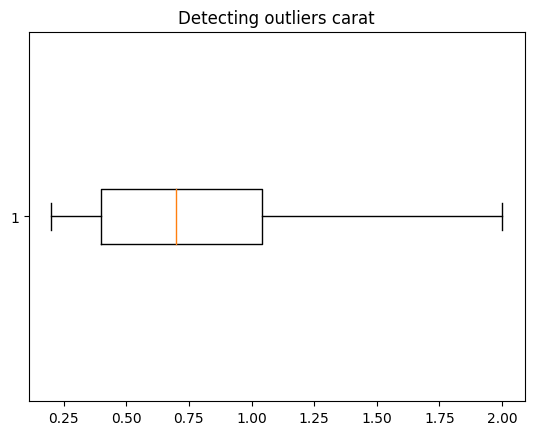

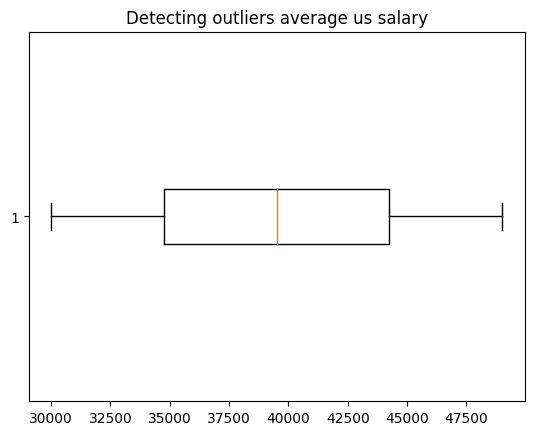

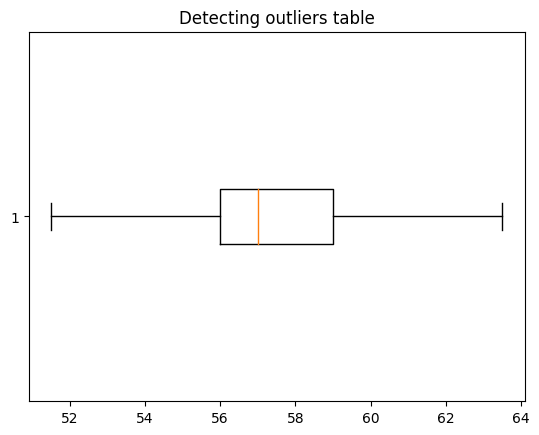

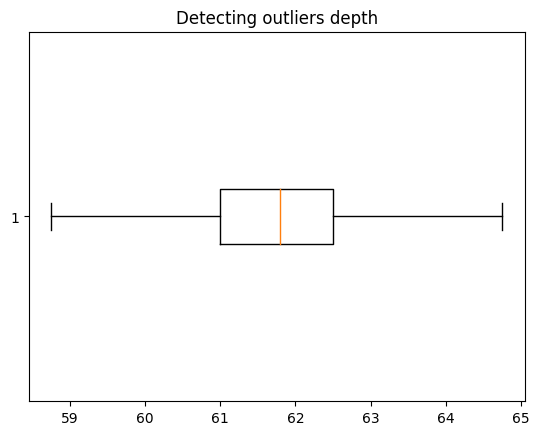

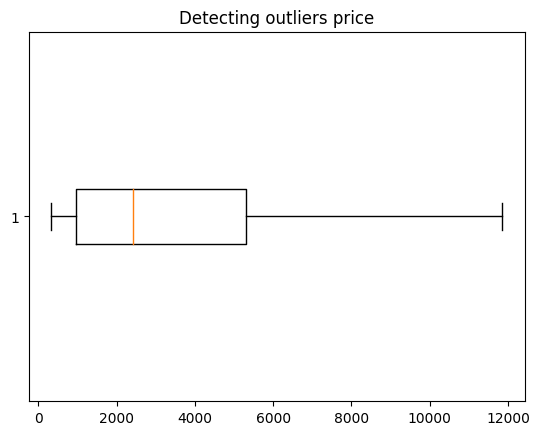

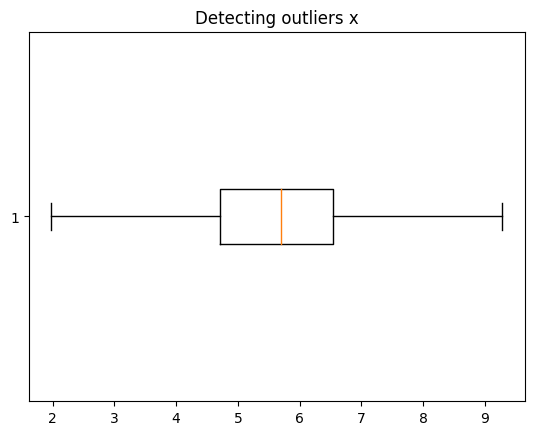

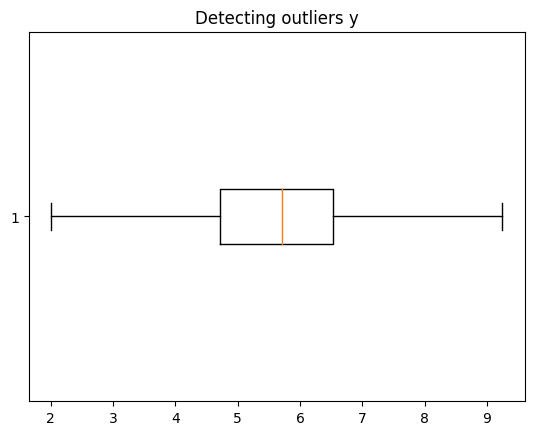

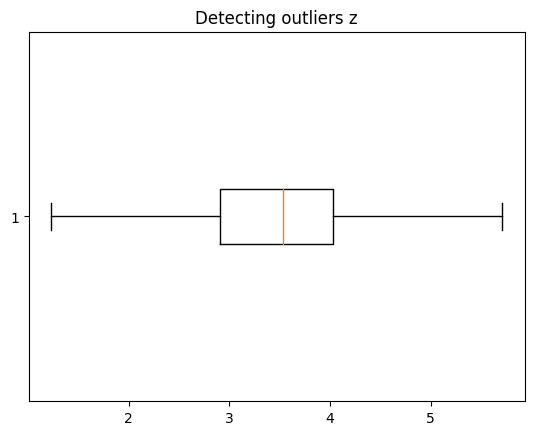

,0
carat,float64
cut,object
color,object
clarity,object
average us salary,int64
number of diamonds mined (millions),float64
depth,float64
table,float64
price,float64
x,float64


In [6]:
#to check if the oultiers are fixed

#using the same code as used for preprocessing dataset 1
for col in columns_numeric:
  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)

  inter_quatile_rng = q3 - q1
  lower_bound = q3 + (1.5 * inter_quatile_rng)
  upper_bound = q1 - (1.5 * inter_quatile_rng)

  df[col] = df[col].clip(lower_bound,upper_bound)

#to check if the outliers are fixed
for col in columns_numeric:
  plt.boxplot(df[col], vert=False)
  plt.title(f"Detecting outliers {col}")
  plt.show()

df.dtypes

In [7]:
# #changing string datatype to categorical

# #new dataframe with the categorical types
# new_df = df.copy()

# print(df['color'].unique())
# print(df['cut'].unique())
# print(df['clarity'].unique())

# #using the approach from assignment A0 here for categorcial
# new_df['color'] = df['color'].astype("category")
# new_df['color'].replace(['E','I', 'J', 'H', 'F', 'G', 'D', 'Unkown'], [1,2,3,4,5,6,7,8],inplace=True)

# new_df['cut'] = df['cut'].astype("category")
# new_df['cut'].replace(['Ideal', 'Premium', 'Good', 'Very Good', 'Unkown', 'Fair'], [1,2,3,4,5,6],inplace=True)

# new_df['clarity'] = df['clarity'].astype("category")
# new_df['clarity'].replace(['Si2', 'Si1', 'Vs1', 'Vs2', 'Vvs2', 'Vvs1', 'I1', 'Unkown', 'If'], [1,2,3,4,5,6,7,8,9],inplace=True)

# print(new_df)

In [8]:
#making the cut column into categorical data
#Create dummy variables
categorical_data = pd.get_dummies(df, columns=['cut'])

categorical_data['cut_Ideal']= categorical_data['cut_Ideal'].astype(float)
# categorical_data.head()

print(categorical_data)


       carat color clarity  average us salary  \
0       0.23     E     Si2              31282   
1       0.21     E     Si1              40049   
2       0.23     E     Vs1              33517   
3       0.29     I     Vs2              38495   
4       0.31     J     Si2              34178   
...      ...   ...     ...                ...   
53935   0.72     D     Si1              43892   
53936   0.72     D     Si1              35532   
53937   0.70     D     Si1              32133   
53938   0.86     H     Si2              44248   
53939   0.75     D     Si2              41412   

       number of diamonds mined (millions)  depth  table   price     x     y  \
0                                     5.01  61.50   55.0   326.0  3.95  3.98   
1                                     1.69  59.80   61.0   326.0  3.89  3.84   
2                                     3.85  58.75   63.5   327.0  4.05  4.07   
3                                     3.49  62.40   58.0   334.0  4.20  4.23   
4          

Creating the training set and choosing the y target

In [9]:
y = categorical_data['carat']
# y.values.reshape(len(y), 1)
print(y.shape)

#choosing the features based on the correlation matrix values related to cut that have values more that 0.1
X = categorical_data[['price','x']].values

print(X.shape)
# print(categorical_data.dtypes)

(49123,)
(49123, 2)


In [10]:
print(X)

[[ 326.      3.95]
 [ 326.      3.89]
 [ 327.      4.05]
 ...
 [2757.      5.66]
 [2757.      6.15]
 [2757.      5.83]]


In [11]:

samples = X.shape[0]
train_size = int(samples*0.8) #80% training and 20% testing
# print(samples)
# print(train_size)
# Split data into test and train
# train = df[0:train_size]
# test = df[train_size:]

#spit it 80/20
X_train = X[0:train_size]
y_train = y[0:train_size].values.reshape(-1,1)
X_test = X[train_size:]
y_test = y[train_size:].values.reshape(-1,1)

print("X_train shape:",X_train.shape)
print("y_train shape:",y_train.shape)
print("X_test shape:",X_test.shape)
print("y_test shape:",y_test.shape)

X_train shape: (39298, 2)
y_train shape: (39298, 1)
X_test shape: (9825, 2)
y_test shape: (9825, 1)


In [12]:
#normalize the train and test data

#X_train
min_value_x_train = np.min(X_train, axis=0)
max_value_x_train = np.max(X_train, axis=0)
X_train = (X_train - min_value_x_train) / (max_value_x_train - min_value_x_train)

#X_test
min_value_x_test = np.min(X_test, axis=0)
max_value_x_test = np.max(X_test, axis=0)
X_test = (X_test - min_value_x_test) / (max_value_x_test - min_value_x_test)

# print(categorical_data.min())
# print(min_value)
# print(categorical_data.max())
# print(max_value)

print(X_train)

[[0.00000000e+00 2.70205479e-01]
 [0.00000000e+00 2.61986301e-01]
 [8.67961376e-05 2.83904110e-01]
 ...
 [9.22642942e-02 4.68835616e-01]
 [9.23510904e-02 4.78424658e-01]
 [9.23510904e-02 4.56506849e-01]]


Creating the Linear regression using OLS using 𝒘 formula

In [13]:
import numpy
import pandas
import matplotlib.pyplot as plt


# a) fucntion to calculate the weights
def linearregression_train(X,y):

  X = np.c_[np.ones((X.shape[0], 1)), X]
  first_product = np.dot(X.T,X)  #(𝑿^𝑇 * 𝑿)
  first_product_inverse = np.linalg.inv(first_product) # inverse of first part
  second_product = np.dot(X.T,y)

  #multiply both first and secon products and gives the result for weight
  w = np.dot(first_product_inverse, second_product)

  return w

#b) function to calculate predicitons and mean squared error
def predict(X,w):
  X = np.c_[np.ones((X.shape[0], 1)), X]  # add x0 = 1
  return np.dot(X, w)


def mean_squared_error(actual_targets, predictions):
  total_error = 0.0
  final_mse = 0.0
  for i in range(len(actual_targets)):
    error = predictions[i] - actual_targets[i]
    total_error += (error ** 2)
  final_mse = total_error / float(len(actual_targets))
  return final_mse


In [15]:
#calling the functions to train
w = linearregression_train(X_train, y_train)
y_predicted_train = predict(X_train, w)
y_predicted_test = predict(X_test, w)
print(w)
mse_train = mean_squared_error(y_train, y_predicted_train)
mse_test = mean_squared_error(y_test, y_predicted_test)


print(f"MSE (Train): {mse_train}")
print(f"MSE (Test): {mse_test}")

pickle.dump( w, open( "Rebecca_Abraham_assignment1_part3_linear.p", "wb" ) )

[[-0.49756899]
 [ 0.33349582]
 [ 2.32942383]]
MSE (Train): [0.00665963]
MSE (Test): [0.40643448]


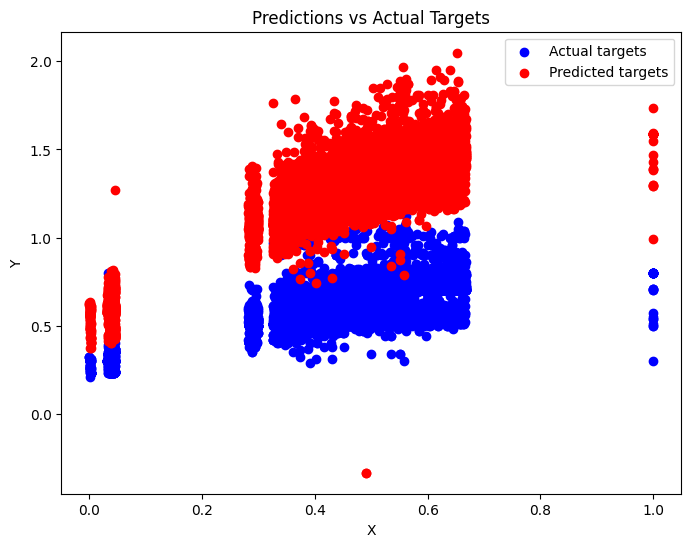

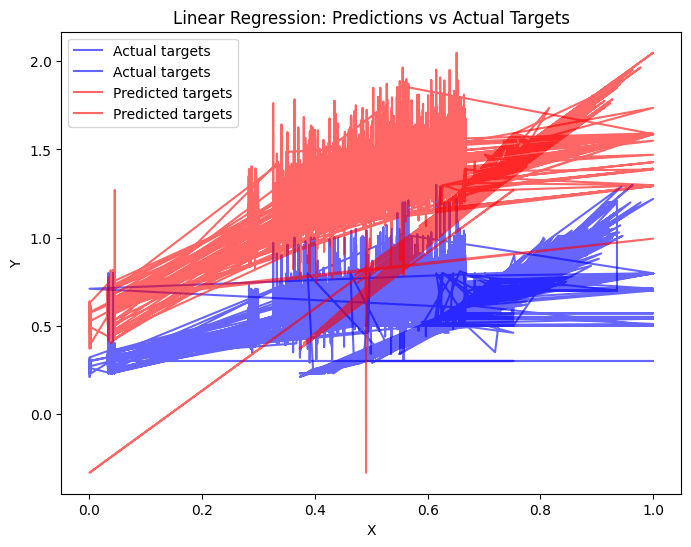

In [16]:
plt.figure(figsize=(8, 6))
plt.scatter(X_test[:,0], y_test, color='blue', label='Actual targets')
plt.scatter(X_test[:,0], y_predicted_test, color='red', label='Predicted targets')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Predictions vs Actual Targets')
plt.legend()
plt.show()

#to show the grpah with all features choosen
plt.figure(figsize=(8, 6))
plt.plot(X_test, y_test, color='blue', label='Actual targets', alpha=0.6)
plt.plot(X_test, y_predicted_test, color='red', label='Predicted targets', alpha=0.6)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Linear Regression: Predictions vs Actual Targets')
plt.legend()
plt.show()


Ridge Regression using OLS

In [17]:
lambda_value = 1000 # started with 1 and went even to 100 and no change then changed it so this high value to see a difference

def ridgeRegression(X, y):
  X = np.c_[np.ones((X.shape[0], 1)), X]
  I = np.identity(X.shape[1])
  first_product = np.dot(X.T,X)  #(𝑿^𝑇 * 𝑿)
  sum = first_product + (lambda_value * I) #(𝑿^𝑇 * 𝑿 + 𝝀𝑰)
  first_product_inverse = np.linalg.inv(sum) # inverse of first part
  second_product = np.dot(X.T,y)

  #multiply both first and secon products and gives the result for weight
  w = np.dot(first_product_inverse, second_product)

  # print(w)
  return w

def predict(X,w):
  X = np.c_[np.ones((X.shape[0], 1)), X]  # add x0 = 1
  return np.dot(X, w)

def regularized_squared_error(actual_targets, predictions, w):
  total_error = 0.0
  final_squared_loss = 0.0
  for i in range(len(actual_targets)):
    error = predictions[i] - actual_targets[i]
    total_error = total_error + (error ** 2)

  final_squared_loss = (1/(2 * len(actual_targets))) * total_error + (0.5 * lambda_value * np.sum(w[1:] ** 2))
  # final_squared_loss = 0.5 * np.sum((actual_targets - predictions) ** 2) + 0.5 * lambda_value * np.sum(w ** 2)
  return final_squared_loss

In [18]:
#calling the functions to train
w = ridgeRegression(X_train, y_train)
print(w)
y_predicted_train = predict(X_train, w)
y_predicted_test = predict(X_test, w)

squared_loss_train = regularized_squared_error(y_train, y_predicted_train,w)
squared_loss_test = regularized_squared_error(y_test, y_predicted_test, w)

#was a bit confused with which squared loss to use so calculated both mse and the ridge regularized loss too
mse_train = mean_squared_error(y_train, y_predicted_train)
mse_test = mean_squared_error(y_test, y_predicted_test)

print(f"MSE (Train): {mse_train}")
print(f"MSE (Test): {mse_test}")

print(f"Squared loss (Train): {squared_loss_train}")
print(f"Squared loss (Test): {squared_loss_test}")

pickle.dump( w, open( "Rebecca_Abraham_assignment1_part2.p", "wb" ) )

[[0.15202761]
 [0.88006065]
 [0.74287189]]
MSE (Train): [0.02189802]
MSE (Test): [0.19948466]
Squared loss (Train): [663.19364532]
Squared loss (Test): [663.28243865]


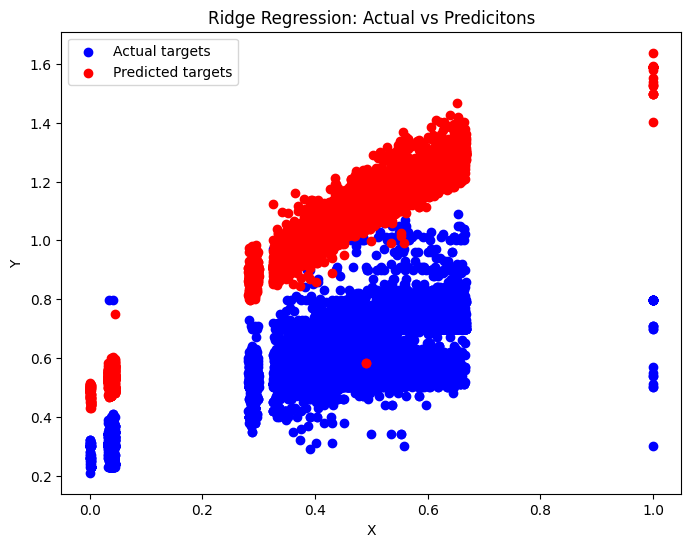

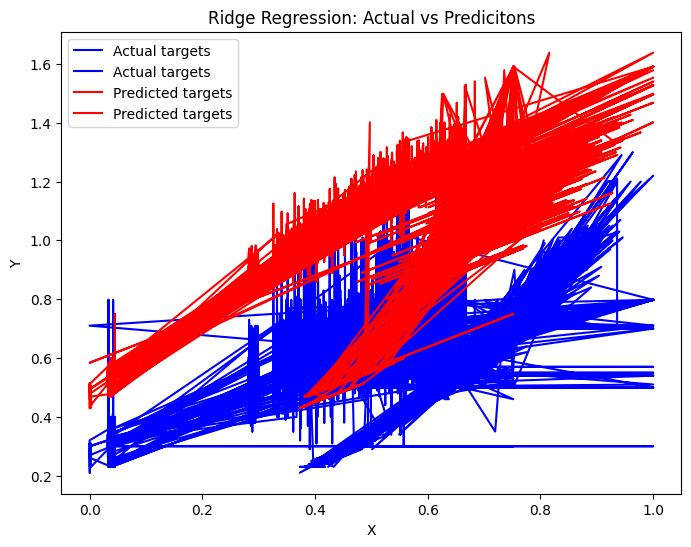

In [19]:
plt.figure(figsize=(8, 6))
plt.scatter(X_test[:, 0], y_test, color='blue', label='Actual targets')
plt.scatter(X_test[:, 0], y_predicted_test, color='red', label='Predicted targets')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Ridge Regression: Actual vs Predicitons')
plt.legend()
plt.show()

#the below graph is not really clear hence used the scatter plot above.
plt.figure(figsize=(8, 6))
plt.plot(X_test, y_test, color='blue', label='Actual targets')
plt.plot(X_test, y_predicted_test, color='red', label='Predicted targets')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Ridge Regression: Actual vs Predicitons')
plt.legend()
plt.show()